In [7]:
import os
#os.chdir("podatki/")
!cat naloge.csv


102.dat, 101.dat, 0.10487562189054722, 0.8097369239895477
103.dat, 101.dat, 0.13573770491803278, 0.5341886970343193
103.dat, 102.dat, 0.163200391485197, 0.33372911808930594
104.dat, 101.dat, 0.09625, 0.8908590357290347
104.dat, 102.dat, 0.15578358208955223, 0.3750766791435019
104.dat, 103.dat, 0.09426229508196726, 0.9325428518035856
105.dat, 101.dat, 0.1035897435897436, 0.8286218881453938
105.dat, 102.dat, 0.14098737083811708, 0.49707469354536393
105.dat, 103.dat, 0.09029003783102141, 0.9503976013994628
105.dat, 104.dat, 0.10649038461538463, 0.837354838734798
106.dat, 101.dat, 0.11393939393939395, 0.7799605004626842
106.dat, 102.dat, 0.14762550881953873, 0.4930538398826752
106.dat, 103.dat, 0.0757078986587183, 0.994888822057794
106.dat, 104.dat, 0.10056818181818183, 0.9112743491798576
106.dat, 105.dat, 0.08811188811188808, 0.9680815275360708
107.dat, 101.dat, 0.07925925925925925, 0.9857177216977346
107.dat, 102.dat, 0.146489773355445, 0.5095023079284788
107.dat, 103.dat, 0.120825743776

0 7 5
not enough values to unpack (expected 3, got 2)
Leto: 2010, dolžina areja: 139, povprečje: -25.681055155875303
Leto: 2011, dolžina areja: 192, povprečje: -28.34453125
Leto: 2013, dolžina areja: 168, povprečje: -45.69424603174603
Leto: 2014, dolžina areja: 209, povprečje: -63.235326953748
Kolmogorov-Smirnov za leto 2010 in 2010:
        D=0.0, p-vrednost = 1.0
Kolmogorov-Smirnov za leto 2011 in 2010:
        D=0.196, p-vrednost = 0.003369
Kolmogorov-Smirnov za leto 2011 in 2011:
        D=0.0, p-vrednost = 1.0
Kolmogorov-Smirnov za leto 2013 in 2010:
        D=0.248, p-vrednost = 0.0001325
Kolmogorov-Smirnov za leto 2013 in 2011:
        D=0.347, p-vrednost = 4.818e-10
Kolmogorov-Smirnov za leto 2013 in 2013:
        D=0.0, p-vrednost = 1.0
Kolmogorov-Smirnov za leto 2014 in 2010:
        D=0.271, p-vrednost = 6.386e-06
Kolmogorov-Smirnov za leto 2014 in 2011:
        D=0.363, p-vrednost = 3.777e-12
Kolmogorov-Smirnov za leto 2014 in 2013:
        D=0.111, p-vrednost = 0.186
Kolmo

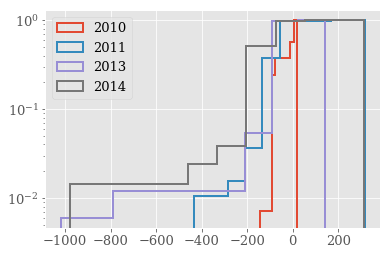

In [22]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os, sys


np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

slovar_filenameov_po_letnikih = {"10":[],"11":[],"13":[],"14":[]}
#os.chdir("podatki/")
fajli = !ls *.dat
for filename in fajli:
    _, tmXX, YYY = filename.split("_")
    letnik = tmXX[-2:]
    slovar_filenameov_po_letnikih[letnik].append(filename)
def minutaj(arej):
    """Dobi arej stringov formata \pmHH:MM:SS
    Vrne minute (float)."""
    rez = []
    for string in arej:
        try:
            HH, MM, SS = string.split(":")
        except Exception as e:
            print(HH, MM, SS)
            print(e)
        HH, MM, SS = int(HH), int(MM), int(SS)
        if HH <0:
            sign = -1
            HH = abs(HH)
        else:
            sign = 1
        rez.append(sign*(60*HH+MM+SS/60))
    assert len(rez)==len(arej), "Dolžina rezultatov in vhoda se mora ujemat!!"
    return rez


minute_po_letih = {"10":[],"11":[],"13":[],"14":[]}
for leto in slovar_filenameov_po_letnikih.keys():
    print(f"Gledam leto {leto}", end="\r")
    for fajl in slovar_filenameov_po_letnikih[leto]:
        print(f"Gledam fajl {fajl}", end="\r")
        arej = np.genfromtxt(fajl, dtype=str)
        minute_po_letih[leto]+=minutaj(arej)
for leto, arej in minute_po_letih.items():
    print(f"Leto: 20{leto}, dolžina areja: {len(arej)}, povprečje: {np.mean(arej)}")
    
from scipy.stats import ks_2samp
for leto1, arej1 in minute_po_letih.items():
    for leto2, arej2 in minute_po_letih.items():
        if leto1 >= leto2:
            print(f"Kolmogorov-Smirnov za leto 20{leto1} in 20{leto2}:")
            D, p = ks_2samp(arej1, arej2)
            print(f"        D={D:.03}, p-vrednost = {p:.04}")
for leto, arej in minute_po_letih.items():
    plt.hist(arej, cumulative=1, density=1,histtype="step", label=f"20{leto}", linewidth=2)
plt.legend(loc="upper left")
plt.semilogy()
plt.savefig("3-1-po-letih.pdf")
plt.show()

## Drugi del: gledamo naloge, ne leta

0 7 5
not enough values to unpack (expected 3, got 2)
Naloga: 101, dolžina areja: 75, povprečje: -41.4 min
Naloga: 102, dolžina areja: 67, povprečje: -46.8 min
Naloga: 103, dolžina areja: 61, povprečje: -30.7 min
Naloga: 104, dolžina areja: 64, povprečje: -36.4 min
Naloga: 105, dolžina areja: 65, povprečje: -29.5 min
Naloga: 106, dolžina areja: 55, povprečje: -33.9 min
Naloga: 107, dolžina areja: 54, povprečje: -38.9 min
Naloga: 108, dolžina areja: 50, povprečje: -14.7 min
Naloga: 109, dolžina areja: 57, povprečje: -53.4 min
Naloga: 110, dolžina areja: 47, povprečje: -40.6 min
Naloga: 111, dolžina areja: 42, povprečje: -66.2 min
Naloga: 112, dolžina areja: 42, povprečje: -32.5 min
Naloga: 113, dolžina areja: 29, povprečje: -1.29e+02 min
102.dat, 101.dat, 0.10487562189054722, 0.8097369239895477
103.dat, 101.dat, 0.13573770491803278, 0.5341886970343193
103.dat, 102.dat, 0.163200391485197, 0.33372911808930594
104.dat, 101.dat, 0.09625, 0.8908590357290347
104.dat, 102.dat, 0.15578358208955

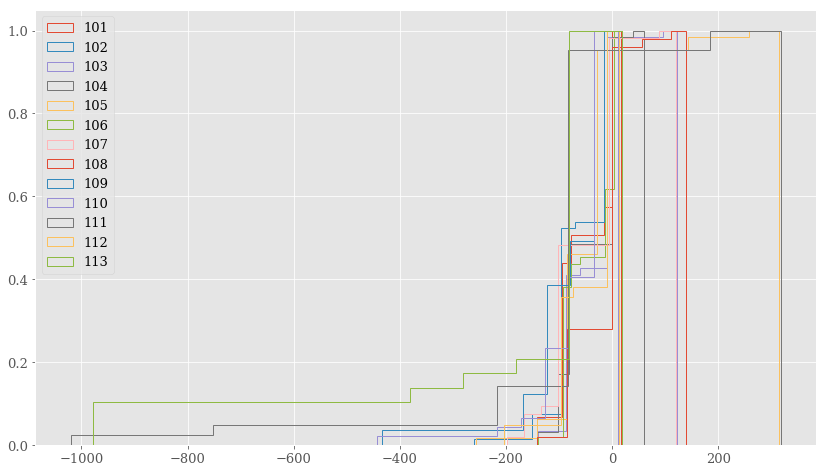

In [47]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os, sys


np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

slovar_filenameov_po_nalogah = {}
#os.chdir("podatki/")
fajli = !ls *.dat
for filename in fajli:
    _, tmXX, YYY = filename.split("_")
    letnik = tmXX[-2:]
    naloga = YYY    
    try:
        slovar_filenameov_po_nalogah[naloga].append(filename)
    except KeyError:
        slovar_filenameov_po_nalogah[naloga] = []
        slovar_filenameov_po_nalogah[naloga].append(filename)        
def minutaj(arej):
    """Dobi arej stringov formata \pmHH:MM:SS
    Vrne minute (float)."""
    rez = []
    for string in arej:
        try:
            HH, MM, SS = string.split(":")
        except Exception as e:
            print(HH, MM, SS)
            print(e)
        HH, MM, SS = int(HH), int(MM), int(SS)
        if HH <0:
            sign = -1
            HH = abs(HH)
        else:
            sign = 1
        rez.append(sign*(60*HH+MM+SS/60))
    assert len(rez)==len(arej), "Dolžina rezultatov in vhoda se mora ujemat!!"
    return rez


minute_po_nalogah = {}
for naloga in slovar_filenameov_po_nalogah.keys():
    print(f"Gledam nalogo {naloga}", end="\r")
    for fajl in slovar_filenameov_po_nalogah[naloga]:
        print(f"Gledam fajl {fajl}", end="\r")
        arej = np.genfromtxt(fajl, dtype=str)
        try:
            minute_po_nalogah[naloga]+=minutaj(arej)
        except KeyError:
            minute_po_nalogah[naloga] = minutaj(arej)
for naloga, arej in minute_po_nalogah.items():
    print(f"Naloga: {naloga[:-4]}, dolžina areja: {len(arej)}, povprečje: {np.mean(arej):.03} min")
    
from scipy.stats import ks_2samp
for naloga1, arej1 in minute_po_nalogah.items():
    for naloga2, arej2 in minute_po_nalogah.items():
        if naloga1 > naloga2:
            print(f"{naloga1}, {naloga2}, {ks_2samp(arej1, arej2)[0]}, {ks_2samp(arej1, arej2)[1]}")
            
plt.figure(figsize=(14,8))
for naloga, arej in minute_po_nalogah.items():
    plt.hist(arej, cumulative=1, density=1,histtype="step", label=f"{naloga[:-4]}", linewidth=1)
plt.legend(loc="upper left")

#plt.savefig("3-1-po-nalogah.pdf")
plt.show()

In [60]:
data = pd.read_csv("naloge.csv", names=["naloga1", "naloga2", "D", "p"])
print(data.sort_values(by="p").to_latex(index=0))

\begin{tabular}{llrr}
\toprule
 naloga1 &   naloga2 &         D &         p \\
\midrule
 108.dat &   102.dat &  0.286567 &  0.014125 \\
 109.dat &   108.dat &  0.281754 &  0.023039 \\
 108.dat &   101.dat &  0.253333 &  0.034839 \\
 108.dat &   105.dat &  0.230769 &  0.083878 \\
 108.dat &   104.dat &  0.220000 &  0.114117 \\
 112.dat &   102.dat &  0.228145 &  0.116893 \\
 108.dat &   107.dat &  0.225926 &  0.121638 \\
 111.dat &   108.dat &  0.226667 &  0.166050 \\
 110.dat &   108.dat &  0.218298 &  0.173427 \\
 108.dat &   103.dat &  0.193770 &  0.226685 \\
 112.dat &   109.dat &  0.203008 &  0.241985 \\
 112.dat &   101.dat &  0.192381 &  0.243781 \\
 113.dat &   102.dat &  0.211014 &  0.292286 \\
 108.dat &   106.dat &  0.185455 &  0.297383 \\
 103.dat &   102.dat &  0.163200 &  0.333729 \\
 104.dat &   102.dat &  0.155784 &  0.375077 \\
 112.dat &   111.dat &  0.190476 &  0.392315 \\
 110.dat &   102.dat &  0.162591 &  0.424604 \\
 112.dat &   107.dat &  0.174603 &  0.430234 \\


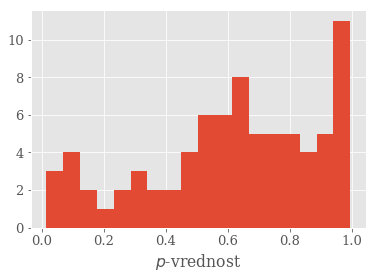

In [69]:
plt.hist(data.p, bins=18)
plt.xlabel("$p$-vrednost")
plt.savefig("3-3-histogram-p.pdf")